# MTH793P - Coursework 6-1

This is a template notebook for the computational exercises of Coursework 6, part **1/2** of the module MTH793P, Advanced machine learning. 

In this part we will see how to compress an image using SVD.

In [1]:
### 
### Required imports
###

import numpy as np
from skimage.data import astronaut
import matplotlib.pyplot as plt

from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

%matplotlib inline

Write a function called **<font color='red'>low_rank</font>** that takes a matrix **<font color='red'>M</font>** and a desired rank **<font color='red'>k</font>**, and returns the best approximation for **M** by a rank **k** matrix.

In [2]:
def low_rank(M, k):
### BEGIN SOLUTION
    U, _, _ = np.linalg.svd(M,full_matrices=False)   
    Uk = U[:, :k]
    return Uk @ Uk.T @ M
### END SOLUTION

You can test your function here.

In [4]:
M_test = np.array([[1,2,3,4,5],[2,1,4,8,6],[4,3,9,7,0],[9,6,7,0,4]])
RES_1 = np.array([[2.86857743, 2.06491829, 3.94694634, 2.96630631, 2.2093186 ],
 [4.16199092, 2.99596973, 5.72658581, 4.30378478, 3.20547872],
 [5.08125229, 3.65769132, 6.99142017, 5.25436424, 3.91347469],
 [5.13050671, 3.69314665, 7.05919054, 5.3052967,  3.95140941]])
RES_2 = np.array([[1.53453369, 1.23343206, 3.6644173,  4.80655923, 2.75253225],
 [1.30411594, 1.21470602, 5.12133379, 8.24609389, 4.36918622],
 [4.54434172, 3.32304432, 6.87771114, 5.99500805, 4.13210106],
 [8.72653271, 5.93448704, 7.8207711,  0.34474168, 2.48713178]])

M_1 = low_rank(M_test,1)
M_2 = low_rank(M_test,2)

assert_almost_equal(RES_1, M_1)
assert_almost_equal(RES_2, M_2)

We load the image of Eileen Collins into a variable named **<font color='red'>image</font>**.<br>
The image is 512x512 pixels, stored as a 512x512x3 matrix (3 colour channels).

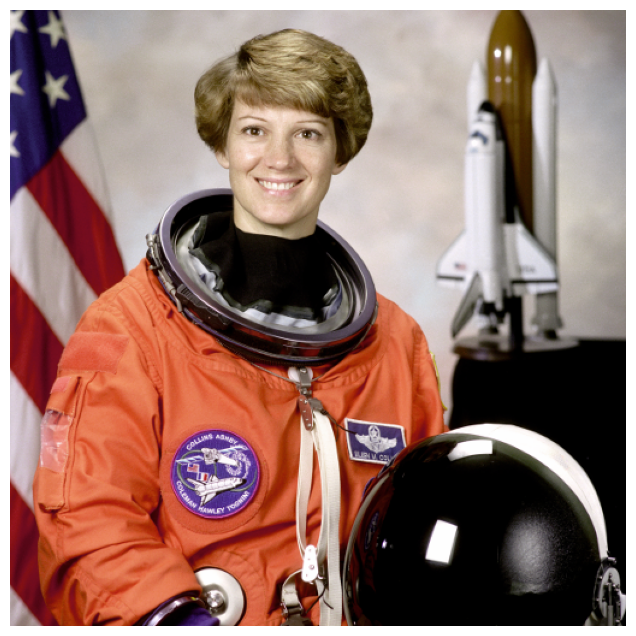

In [5]:
image = astronaut()
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off') ;

Next, you should separate the image into the three colour channels (RGB).<br>
Also, make sure that the values are scaled to be between 0 and 1 (instead of 0 to 255).<br>
Name the results **<font color='red'>image_R</font>**, **<font color='red'>image_G</font>**, and **<font color='red'>image_B</font>**.

In [6]:
### BEGIN SOLUTION 
image_R = image[:,:,0] / 255.0
image_G = image[:,:,1] / 255.0
image_B = image[:,:,2] / 255.0
### END SOLUTION 

We present the three colour channels.

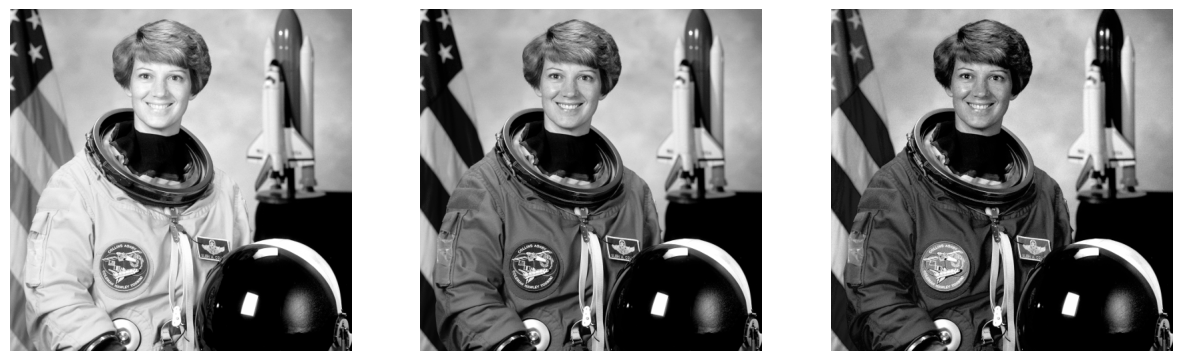

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.imshow(image_R, cmap='gray')
plt.axis('off') ;

plt.subplot(1,3,2)
plt.imshow(image_G, cmap='gray')
plt.axis('off') ;

plt.subplot(1,3,3)
plt.imshow(image_B, cmap='gray')
plt.axis('off') ;

Compute the **singular values** for each of the channels separately.<br>
Read carefully the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to see what are the input and output variables.<br>
Store the results in **<font color='red'>SR</font>**, **<font color='red'>SG</font>**, **<font color='red'>SB</font>**.

We plot the singular values of all three channels (regular, and log-log).


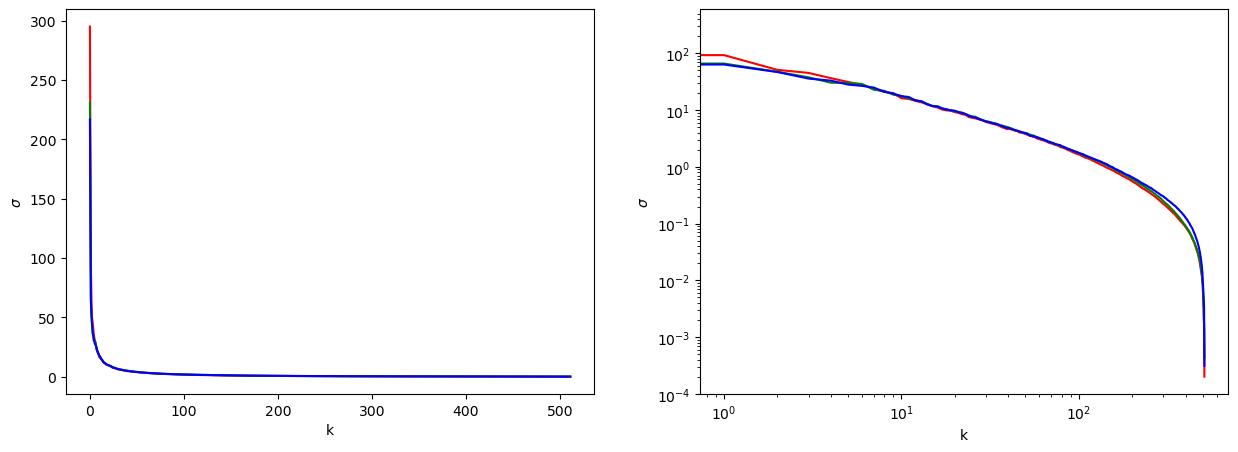

In [8]:
### BEGIN SOLUTION
_, SR, _ = np.linalg.svd(image_R,full_matrices=False)   
_, SG, _ = np.linalg.svd(image_G,full_matrices=False)   
_, SB, _ = np.linalg.svd(image_B,full_matrices=False)   
### END SOLUTION

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(SR, 'r')
plt.plot(SG, 'g')
plt.plot(SB, 'b')
plt.xlabel('k')
plt.ylabel('$\sigma$')

plt.subplot(1, 2, 2)
plt.loglog(SR, 'r')
plt.loglog(SG, 'g')
plt.loglog(SB, 'b')
plt.xlabel('k')
plt.ylabel('$\sigma$');

Recall that the Frobenius norm of a matrix $M$ is
$$ \|M\|_F = \sqrt{\sum_{i,j} M_{ij}^2} = \sqrt{\sum_i \sigma_i^2},$$
where $\sigma_i$ are the singular values of $M$.

Our goal is to compress the image by finding a lower rank approximation. In order to assess the quality of the compressed image we can use the ratio of the Frobenius norm between the compressed image and the original one. Let $M_k$ be the approximation of $M$ by a rank-$k$ matrix. 

Define
$$ \rho_k(M) = \frac{\| M_k\|_F}{\|M\|_F}.$$

Compute the values of $\rho_k(M)$ for $M=$ **image_R,image_G,image_B** (k=1,...,512).<br>
Place the results in **<font color='red'>rho_R</font>**, **<font color='red'>rho_G</font>**, **<font color='red'>rho_B</font>**.

**HINT:** use np.cumsum.

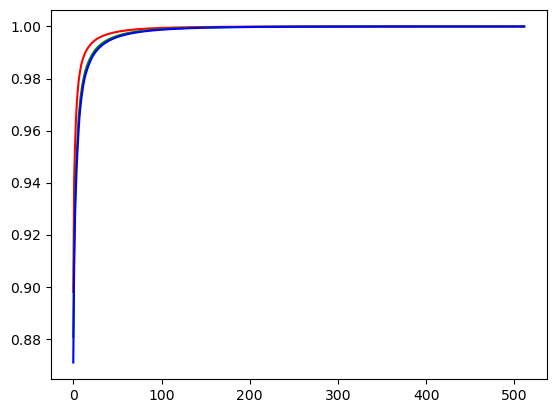

In [9]:
### BEGIN SOLUTION

rho_R = np.sqrt(np.cumsum(SR**2)/np.sum(SR**2))
rho_G = np.sqrt(np.cumsum(SG**2)/np.sum(SG**2))
rho_B = np.sqrt(np.cumsum(SB**2)/np.sum(SB**2))

### END SOLUTION

plt.plot(rho_R, 'r')
plt.plot(rho_G, 'g')
plt.plot(rho_B, 'b');

We want to compress the image, and control the loss of quality.<br>
Find the smallest rank $k$ required (per channel), to achieve $\rho_k >= \text{QUALITY}$.<br>
Store the resulting ranks in **<font color='red'>k_R</font>**, **<font color='red'>k_G</font>**, **<font color='red'>k_B</font>**.

In [11]:
QUALITY = 0.999

In [12]:
### BEGIN SOLUTION

k_R = np.where(rho_R >= QUALITY)[0][0]
k_G = np.where(rho_G >= QUALITY)[0][0]
k_B = np.where(rho_B >= QUALITY)[0][0]

### END SOLUTION

print([k_R, k_G, k_B])

[76, 102, 111]


Test your solution here.

In [13]:
F = 0
try:
    assert_equal([k_R, k_G, k_B], [76, 102, 111])
    F = 1
except:
    pass

try:
    assert_equal([k_R, k_G, k_B], [77, 103, 112])
    F = 1
except:
    pass

assert_equal(F,1)


Compress each of the channels separately, using the **low_rank** function you wrote before.<br> Use **k_R,k_G,k_B** that you found above, as the input. Store the results in **<font color='red'>low_R</font>**, **<font color='red'>low_G</font>**, **<font color='red'>low_B</font>**.<br>

Use **np.clip** to make sure that the resulting matrices contain values between 0 and 1 (so they can be presented properly as an image). 

In [14]:
### BEGIN SOLUTION

low_R = low_rank(image_R, k_R)
low_G = low_rank(image_G, k_G)
low_B = low_rank(image_B, k_B)
low_R = np.clip(low_R, 0, 1)
low_G = np.clip(low_G, 0, 1)
low_B = np.clip(low_B, 0, 1)

### END SOLUTION

We present the three compressed channels, and the resulting compressed coloured image.

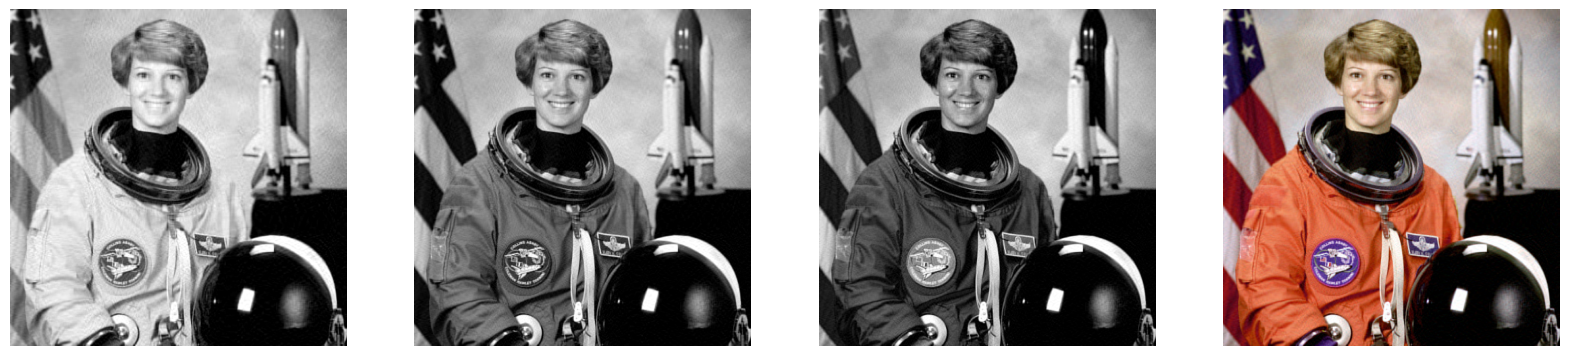

In [15]:
plt.figure(figsize=(20,12))

plt.subplot(1,4,1)
plt.imshow(low_R, cmap='gray')
plt.axis('off') ;
plt.subplot(1,4,2)
plt.imshow(low_G, cmap='gray')
plt.axis('off') ;
plt.subplot(1,4,3)
plt.imshow(low_B, cmap='gray')
plt.axis('off') ;

plt.subplot(1,4,4)
low_im = np.zeros(image.shape)
low_im[:,:,0] = low_R
low_im[:,:,1] = low_G
low_im[:,:,2] = low_B
plt.imshow(low_im)
plt.axis('off') ;

Write a function **<font color='red'>compression_rate</font>** that computes the compression of an image using the low-rank approximation.
The inputs are:

* **<font color='red'>IMH / IMV</font>** - horizontal/vertical size of the image (in pixels).
* **<font color='red'>KR / KG / KB</font>** - the lower rank for each channel.

The output of this function should be the ratio $N_{\text{original}}/N_{\text{compressed}}$, where $N_{\text{original}}$ is the total number of values needed to store the original image (flat, no SVD), and and $N_{\text{compressed}}$ is the total number of values needed to be stored using our low-rank representation.
 

In [16]:
def compression_rate(IMH, IMV, KR, KG, KB):
### BEGIN SOLUTION
    Total = IMH*IMV*3
    Comp = (IMH+IMV+1)*(KR+KG+KB)
    return Total/Comp
### END SOLUTION

You can test your function here:

In [17]:
r_test = compression_rate(123, 456, 7, 8, 9)
RES = 12.087931034482759

assert_almost_equal(RES, r_test)

Compute the compression rate for the image you produced above. Place the reuslt in **<font color='red'>c_rate</font>**.

In [18]:
### BEGIN SOLUTION
c_rate = compression_rate(image_R.shape[0], image_R.shape[1], k_R, k_G, k_B)
### END SOLUTION

print('The compression rate for k_R = %d, k_G = %d, k_B = %d, is: %0.3f' % (k_R, k_G, k_B, c_rate) )

The compression rate for k_R = 76, k_G = 102, k_B = 111, is: 2.655


Finally, we will present a sample of various low-rank versions, together with the compression level achieved.<br>
The list **<font color='red'>KS</font>** contains the different ranks we want to check.<br>
Inside the loop, place the low-rank channels in **<font color='red'>low_R</font>**, **<font color='red'>log_G</font>**, **<font color='red'>low_B</font>** (don't forget to clip the values). <br>
Also - compute the compression rate, and store it in **<font color='red'>c_rate</font>**.

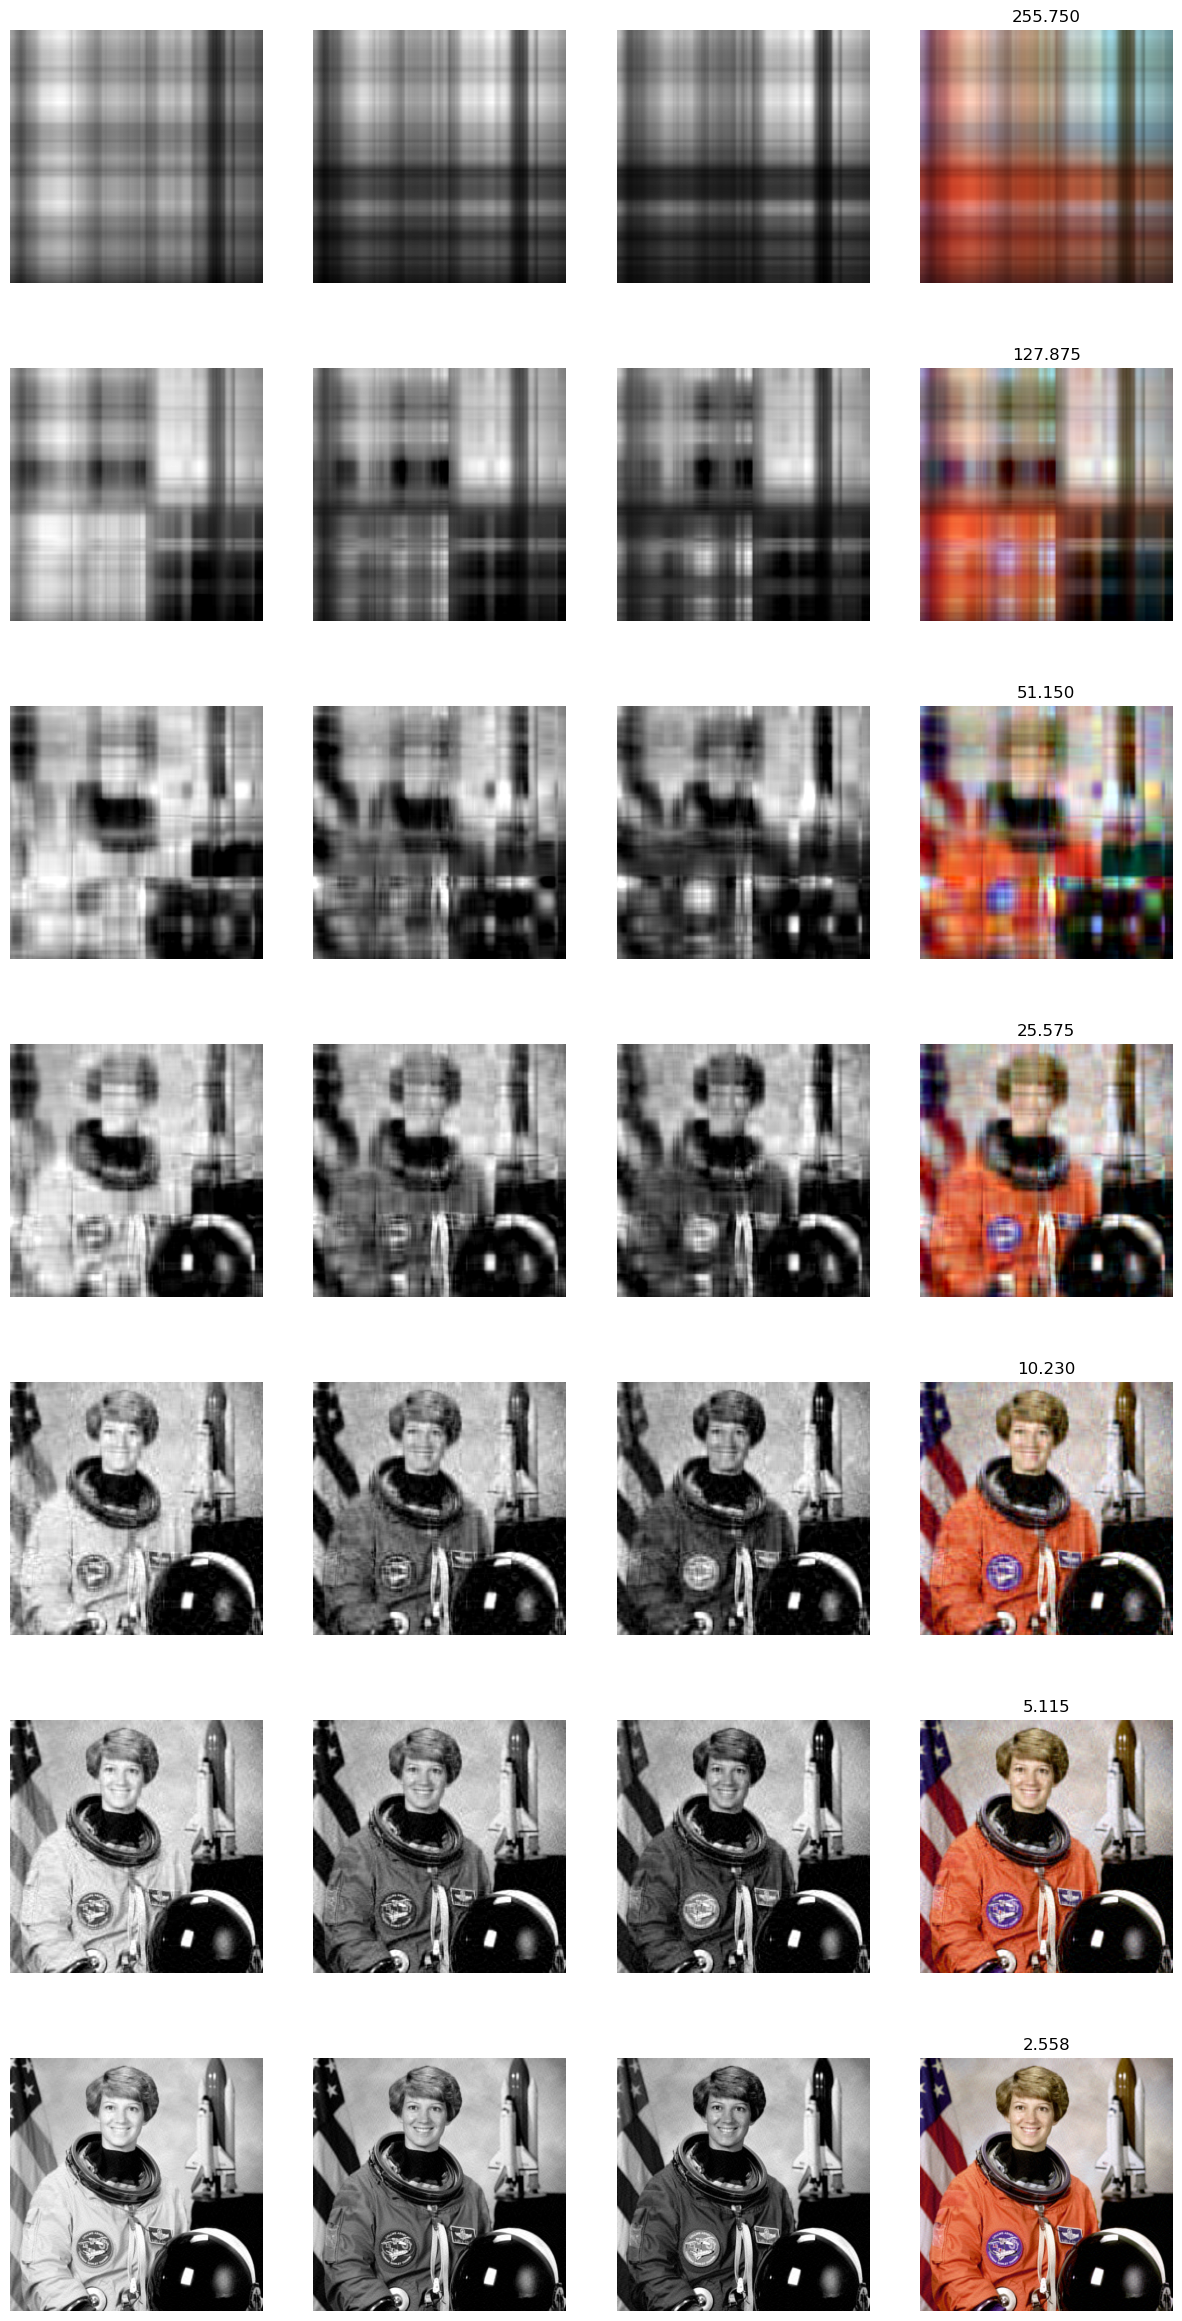

In [19]:
KS = [1, 2, 5, 10, 25, 50, 100]
NK = len(KS)

plt.figure(figsize=(15,30))
c = 0

for K in KS:
    ##########
    ### BEGIN SOLUTION
    low_R = low_rank(image_R, K)
    low_G = low_rank(image_G, K)
    low_B = low_rank(image_B, K)
    low_R = np.clip(low_R, 0, 1)
    low_G = np.clip(low_G, 0, 1)
    low_B = np.clip(low_B, 0, 1)
    
    c_rate = compression_rate(image_R.shape[0], image_R.shape[1], K, K, K)
    ### END SOLUTION
    ##########

    plt.subplot(NK,4,c*4+1)
    plt.imshow(low_R, cmap='gray')
    plt.axis('off') ;
    plt.subplot(NK,4,c*4+2)
    plt.imshow(low_G, cmap='gray')
    plt.axis('off') ;
    plt.subplot(NK,4,c*4+3)
    plt.imshow(low_B, cmap='gray')
    plt.axis('off') ;

    plt.subplot(NK,4,c*4+4)
    low_im = np.zeros(image.shape)
    low_im[:,:,0] = low_R
    low_im[:,:,1] = low_G
    low_im[:,:,2] = low_B
    plt.imshow(low_im)
    plt.axis('off') ;
    plt.title('%0.3f' % c_rate)
    c = c+1
